## HW1: Logistic regression and Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math

# Part 1. Linear regression model

## Load regression data

In [58]:
x_train, x_test, y_train, y_test = np.load('regression_data.npy', allow_pickle=True)

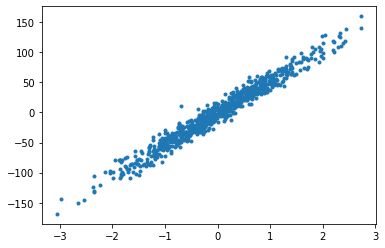

In [59]:
plt.plot(x_train, y_train, '.')

In [7]:
print(x_train.shape)
print(y_train.shape) # different shape -> need to correct before using numpy

print(x_test.shape)
print(x_test.shape)

(750, 1)
(750,)
(250, 1)
(250, 1)


## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [8]:
n = len(x_train)  # data number
m = 0  # slope
c = 0  # intercept

L = 0.05  # learning rate
epochs = 100  # training times

In [9]:
def linear_model(x_test: np.array,
                 m: float,
                 c: float) -> np.array:
    return x_test * m + c

In [10]:
def Mean_square_error(n: int,
                      y_test: float,
                      y_pred: float) -> float:
    result = 0
    for i in range(n):
        result += (y_test[i] - y_pred[i]) * (y_test[i] - y_pred[i])
    
    return 1/n * result 

In [11]:
# Self written functions to calculate partial derivative one by one,
# since python calculate seems to be wrong.

def m_partial_derivative(n: int,
                         x_train: np.array,
                         y_train: np.array,
                         y_predict: np.array) -> float:
    result = 0
    for i in range (n):
        result += x_train[i] * (y_train[i] - y_predict[i])

    return result * -2 / float(n)

def c_partial_derivative(n: int,
                         y_train: np.array,
                         y_predict: np.array) -> float:
    result = 0
    for i in range (n):
        result += y_train[i] - y_predict[i]

    return result * -2 / float(n)


In [12]:
epochs_list = []
# error_list = []
training_loss = []
validation_loss = []

In [13]:

for i in range (epochs):
    y_predict = m * x_train + c
    m_pd = m_partial_derivative(n, x_train, y_train, y_predict)
    c_pd = c_partial_derivative(n, y_train, y_predict)

    m = m - L * m_pd
    c = c - L * c_pd

    epochs_list.append(i)
    training_loss.append(Mean_square_error(len(y_train), y_train, linear_model(x_train, m, c)))
    validation_loss.append(Mean_square_error(len(y_test), y_test, linear_model(x_test, m, c)))
    # error_list.append(Mean_square_error(n, y_train, your_model(x_train, m, c)))

### Q1-3 Weights and Intercepts

In [14]:
print("weights m:\t", m)
print("intercepts c:\t", c)

weights m:	 [52.74049025]
intercepts c:	 [-0.33421033]


### Q1-1 Learning Curve


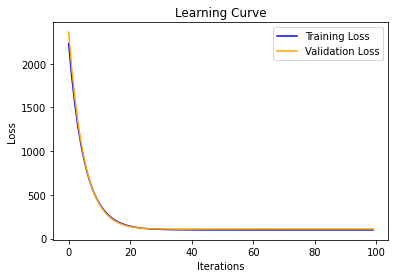

In [23]:
plt.title('Learning Curve')

plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.plot(epochs_list, training_loss, label = 'Training Loss', color='blue')
plt.plot(epochs_list, validation_loss, label = 'Validation Loss', color='orange')

# plt.show()
plt.legend()

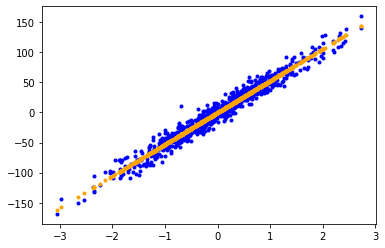

In [16]:
y_pred_from_train = linear_model(x_train, m, c)
y_pred_from_test = linear_model(x_test, m, c)


plt.plot(x_train, y_train, '.', color="blue")
plt.plot(x_train, y_pred_from_train, '.', color="orange")

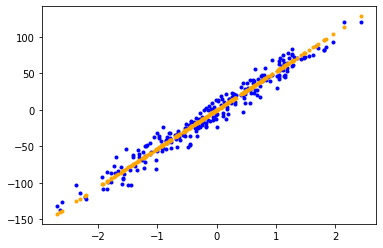

In [17]:
plt.plot(x_test, y_test, '.', color="blue")
plt.plot(x_test, y_pred_from_test, '.', color="orange")

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the loss of (y_test, y_pred)

### Q1-2 Mean Square Error on Test Set

In [18]:
print(Mean_square_error(len(y_test), y_test, linear_model(x_test, m, c)))

[110.42878817]


# Part 2. Logistic regreesion model

## Load classification data

In [3]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

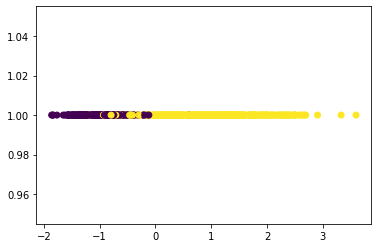

In [4]:
plt.scatter(x_train, np.ones_like(x_train), c=y_train)

In [5]:
print(x_train.shape)
print(y_train.shape)
y_train = y_train.reshape((750, 1))
print(y_train.shape)

print(x_test.shape)
print(x_test.shape)

(750, 1)
(750,)
(750, 1)
(250, 1)
(250, 1)


1. prediction function
   s-shape curve defined as
   p = exp(y) / [1 + exp(y)] = 1 / [1 + exp(-y)]
   y = b0 + b1*x
   p is the probability of event to occur given x
   

In [6]:
# y = w0 + w1*x
w0 = 0
w1 = 0

L_2 = 0.05  # learning rate
epochs_2 = 3000  # training times

In [7]:
def cross_entropy_error(y_prediction, y_train):
    sum = 0
    for i in range (len(y_train)):
        sum += (y_train[i] * np.log(y_prediction[i])) + ((1-y_train[i]) * np.log(1 - y_prediction[i]))

    # print("error", -sum/len(y_train))
    return -sum/len(y_train)

def gradient_of_cross_entropy_error(y_prediction, y_train, x_train):
    sum = 0
    for i in range (len(y_train)):
        sum += (y_prediction[i] - y_train[i]) * x_train[i]

    # print("gradient", sum/len(y_train))
    return sum/len(y_train)

In [8]:
def exponential(y_tmp):
    result = []
    for i in range (len(y_tmp)):
        result.append(math.exp(y_tmp[i]))

    return np.array(result)

In [9]:
train_error_list_2 = []
test_error_list_2 = []
epochs_list_2 = []


for i in range (epochs_2):
    y_tmp = w0 + w1 * x_train
    
    y_prediction = 1 / (1 + exponential(-y_tmp))  #  * -tmp *

    w0 = w0 - L_2 * gradient_of_cross_entropy_error(y_prediction, y_train, np.array(np.full((750), 1)))  # x^0 -> w0
    w1 = w1 - L_2 * gradient_of_cross_entropy_error(y_prediction, y_train, x_train)                      # x^1 -> w1

    train_error_list_2.append(cross_entropy_error(y_prediction, y_train))
    test_error_list_2.append(cross_entropy_error((1 / (1 + exponential(-(w0 + w1 * x_test)))), y_test))
    epochs_list_2.append(i)

### Q2-2 Cross Entropy Error on Test Set

In [10]:
print(cross_entropy_error(1 / (1 + exponential(-(w0 + w1 * x_test))), y_test))

0.18141152276625616


### Q2-3 Weights and Intercept

In [11]:
print("weights w1", w1)
print("intercept w0", w0)

weights w1 [4.18551601]
intercept w0 [1.29283304]


### Q2-1 Learning Curve

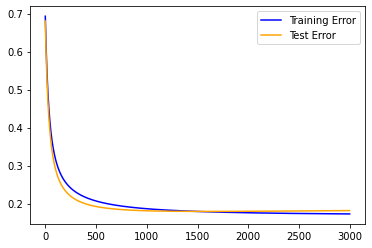

In [12]:
plt.plot(epochs_list_2, train_error_list_2, label = 'Training Error', color='blue')
plt.plot(epochs_list_2, test_error_list_2, label = 'Test Error', color='Orange')

plt.legend()

李鴻毅機器學習: https://blog.csdn.net/weixin_39538889/article/details/99691135

### Accuracy

In [13]:
y_train_predict = 1 / (1 + exponential(-(w0 + w1 * x_train)))
y_test_predict = 1 / (1 + exponential(-(w0 + w1 * x_test)))

y_train_predict_result = []
y_test_predict_result = []
y_train_accuracy = 0
y_test_accuracy = 0

for i in range (len(y_train_predict)):
    if y_train_predict[i] >= 0.5:
        y_train_predict_result.append(1)
    else:
        y_train_predict_result.append(0)
    
    if y_train_predict_result[i] == y_train[i]:
        y_train_accuracy += 1

for i in range (len(y_test_predict)):
    if y_test_predict[i] >= 0.5:
        y_test_predict_result.append(1)
    else:
        y_test_predict_result.append(0)
    
    if y_test_predict_result[i] == y_test[i]:
        y_test_accuracy += 1

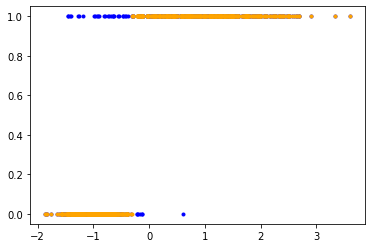

In [14]:
plt.plot(x_train, y_train, '.', color="blue")
plt.plot(x_train, y_train_predict_result, '.', color="orange")

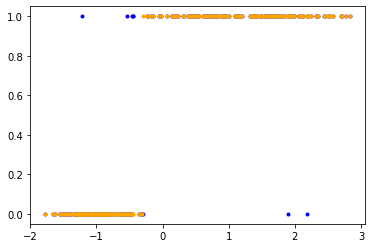

In [15]:
plt.plot(x_test, y_test, '.', color="blue")
plt.plot(x_test, y_test_predict_result, '.', color="orange")

In [16]:
print(y_train_accuracy/len(y_train))
print(y_test_accuracy/len(y_test))

0.9533333333333334
0.968
